In [1]:
#Description: Brain cancer Prediction classification program 

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb

In [12]:
df = pd.read_csv("Brain Tumor.csv")
df


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [4]:
#count tne number of rows and coloums in the data set
df.shape

(1644, 19)

In [5]:
#count the number of empty (NAN,NAN,na) values in each column
df.isna().sum()

Image                   0
Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
Coarseness              0
PSNR                    0
SSIM                  369
MSE                     0
DC                     98
Target                  0
dtype: int64

In [6]:
#Get a count of the number of dataset Kurtosis or Contrast
df["Homogeneity"].count()

1644

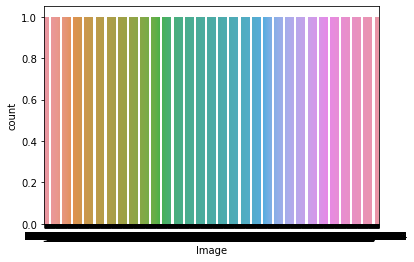

In [7]:
#visualization the count
sns.countplot(df["Image"], label = 'count')

In [8]:
#Look at the data types to see which coloumns need to be encoded
df.dtypes

Image                  object
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
PSNR                  float64
SSIM                  float64
MSE                   float64
DC                    float64
Target                  int64
dtype: object

In [9]:
#Encoded the categorical values
from sklearn.preprocessing import LabelEncoder
labelencode_Y = LabelEncoder()
df.iloc[:,1] = labelencode_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1].values

array([1245,  923,  824, ...,  638,   86,  431], dtype=int64)

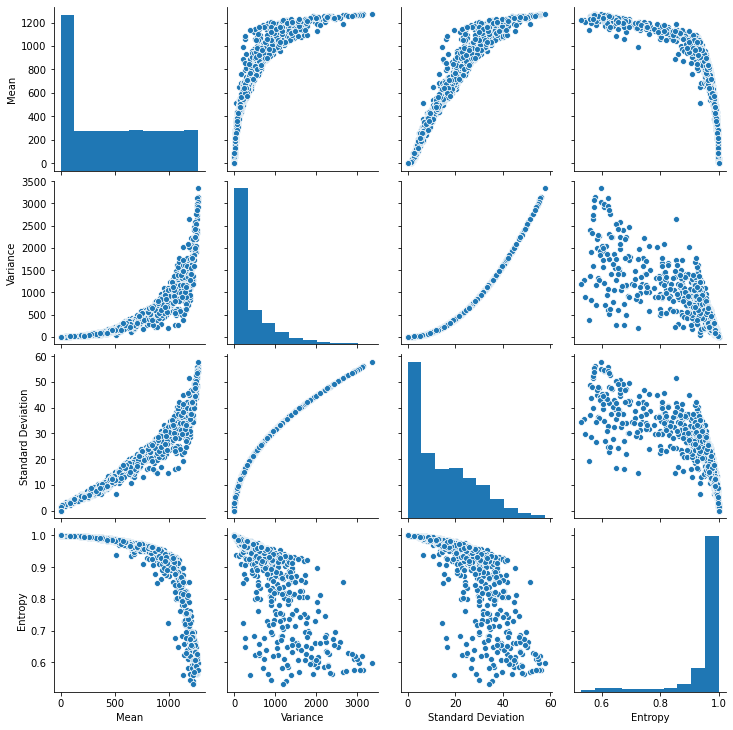

In [10]:
#create a pair plot
sns.pairplot(df.iloc[:,1:5])

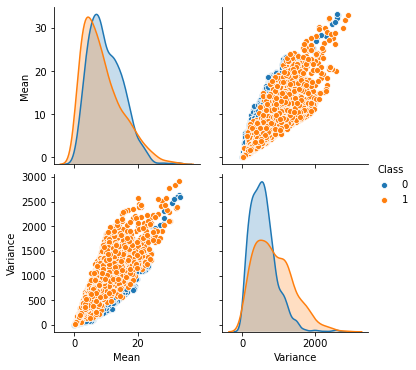

In [13]:
#create a pair plot
sns.pairplot(df.iloc[:,1:4],hue ="Class")

In [14]:
#Print first 5 rows of new data
df.head(5)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [15]:
#Get the corelation of coloumns
df.iloc[:,1:12].corr()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity
Class,1.000000,-0.095729,0.308818,0.285568,-0.778180,0.402644,0.239844,0.212643,-0.862413,-0.758255,-0.847529
Mean,-0.095729,1.000000,0.783027,0.790984,-0.099729,-0.601593,-0.358163,-0.050974,-0.014863,-0.109393,0.095556
Variance,0.308818,0.783027,1.000000,0.975699,-0.344432,-0.347399,-0.248312,0.135494,-0.335470,-0.341061,-0.290527
Standard Deviation,0.285568,0.790984,0.975699,1.000000,-0.345127,-0.425428,-0.329798,0.117981,-0.331103,-0.342530,-0.288801
Entropy,-0.778180,-0.099729,-0.344432,-0.345127,1.000000,-0.222222,-0.140125,-0.140769,0.971260,0.999213,0.852019
Skewness,0.402644,-0.601593,-0.347399,-0.425428,-0.222222,1.000000,0.899713,0.349856,-0.295413,-0.209289,-0.470054
Kurtosis,0.239844,-0.358163,-0.248312,-0.329798,-0.140125,0.899713,1.000000,0.296664,-0.172454,-0.133741,-0.307314
Contrast,0.212643,-0.050974,0.135494,0.117981,-0.140769,0.349856,0.296664,1.000000,-0.130708,-0.139276,-0.270119
Energy,-0.862413,-0.014863,-0.335470,-0.331103,0.971260,-0.295413,-0.172454,-0.130708,1.000000,0.961628,0.915988
ASM,-0.758255,-0.109393,-0.341061,-0.342530,0.999213,-0.209289,-0.133741,-0.139276,0.961628,1.000000,0.837139


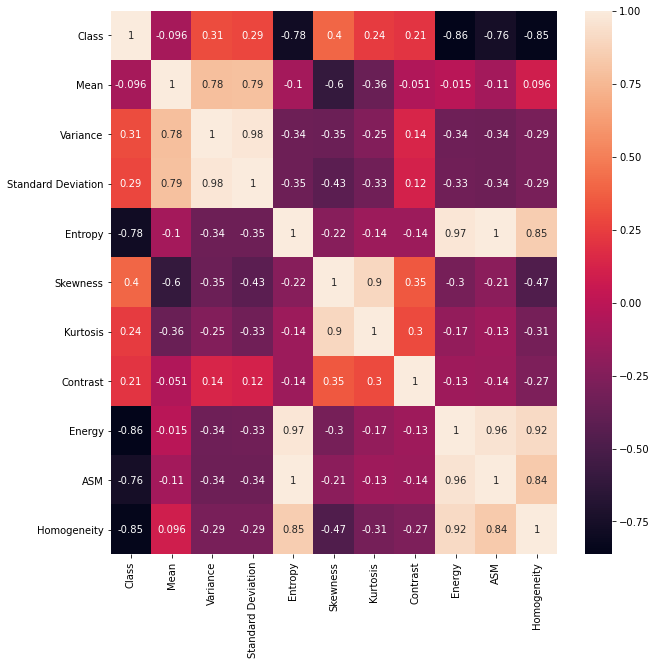

In [16]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)

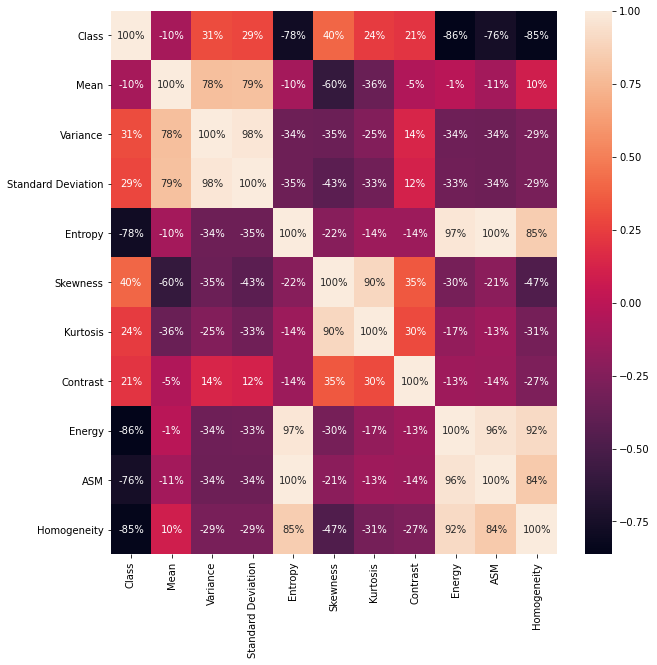

In [17]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt=".0%")

In [18]:
#Split the data set in independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [19]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [20]:
#Scale the data (Feature Sacling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [21]:
X_train

array([[ 6.96477609e-001,  1.90060608e-001,  3.54120064e-001, ...,
        -7.06337837e-001,  8.07192929e-001, -3.84211562e-168],
       [ 6.49319965e-001, -1.72504627e-001, -8.39679512e-003, ...,
        -5.77408495e-001, -3.42129403e-001, -3.84211562e-168],
       [-8.92997526e-001, -3.85299814e-001, -2.44411740e-001, ...,
         9.43200292e-001,  4.65073829e-002,  1.04581725e-167],
       ...,
       [ 5.72575192e-001, -4.90706195e-002,  1.19967317e-001, ...,
        -7.56621630e-001,  7.87749388e-001, -3.84211562e-168],
       [-3.44548764e-001,  9.15853735e-002,  2.59820505e-001, ...,
         1.30588576e+000, -5.03758223e-001, -3.84211562e-168],
       [-1.06528795e+000, -5.79839577e-001, -4.80530614e-001, ...,
         1.28518758e+000, -1.15948657e+000, -3.84211562e-168]])

In [22]:
#Create a function for the models
def models(X_train, Y_train):
   
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Decision Tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print the models accuracy on the training data
    print('[0]Logistic Regression Training Acurracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Acurracy:', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Acurracy:', forest.score(X_train, Y_train))
    
    
    return log, tree, forest

In [23]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Acurracy: 0.9858206309819213
[1]Decision Tree Classifier Training Acurracy: 1.0
[2]Random Forest Classifier Training Acurracy: 0.9996455157745481


In [24]:
#test model acurracyon confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model[0].predict(X_test))
print(cm)

[[501   6]
 [ 20 414]]


In [25]:
#test model acurracyon confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model[0].predict(X_test))

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Acurracy =', (TP + TN)/ (TP + TN + FN + FP))

[[501   6]
 [ 20 414]]
Testing Acurracy = 0.9723698193411264


In [26]:
#test model acurracyon confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model[0].predict(X_test))

for i in range(len(model)):
    print('model', i)
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Testing Acurracy =', (TP + TN)/ (TP + TN + FN + FP))
    print()

model 0
[[501   6]
 [ 20 414]]
Testing Acurracy = 0.9723698193411264

model 1
[[501   6]
 [ 20 414]]
Testing Acurracy = 0.9723698193411264

model 2
[[501   6]
 [ 20 414]]
Testing Acurracy = 0.9723698193411264



In [27]:
#Show another way to get matrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test,model[0].predict(X_test)))
print(accuracy_score(Y_test,model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       507
           1       0.99      0.95      0.97       434

    accuracy                           0.97       941
   macro avg       0.97      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941

0.9723698193411264


In [28]:
#Show another way to get matrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


for i in range(len(model)):
    print('Model', i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test,model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       507
           1       0.99      0.95      0.97       434

    accuracy                           0.97       941
   macro avg       0.97      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941

0.9723698193411264

Model 1
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       507
           1       0.97      0.96      0.97       434

    accuracy                           0.97       941
   macro avg       0.97      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941

0.9691817215727949

Model 2
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       507
           1       1.00      0.96      0.98       434

    accuracy                           0.98       941
   macro avg       0.98      0.98      0.98       941
weighted a

In [29]:
#Print the prediction of random Forest Classifier Model
predict = model[2].predict(X_test)
print(predict)
print()
print(Y_test)

[1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1
 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 